# Email Classification - spam / Ham


In [11]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# laad dataset
data = pd.read_csv("Hamspam.csv",encoding = "ISO-8859-1")

In [5]:
data

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


In [12]:
# text preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download("stopwords")
stop_words = stopwords.words("english")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\venky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    # normalization
    text = text.lower()
    # removing white space at starting and ending
    text = text.strip()
    # removing punctuations
    text = text.translate(str.maketrans("","",string.punctuation))
    # tokenizing the data
    tokens = word_tokenize(text)
    # removing stopwords
    tokens = [ token for token in tokens if token not in stop_words]
    # lemmatization
    tokens = [ lemmatizer.lemmatize(token,pos="v") for token in tokens ]
    return " ".join(tokens)
    

In [19]:
clean_text("hello! it's Q 1 Sample W#$ord the$ is Used for having eating going historyes*)(#}||")

'hello q 1 sample word use eat go historyes'

In [20]:
# applying the cleaning function to each email - document in data
clean  = lambda x: clean_text(x)
data["processed_email"] = data.text.apply(clean)

In [21]:
data

,type,text,processed_email
0,ham,Hope you are having a good week. Just checking in,hope good week check
1,ham,K..give back my thanks.,kgive back thank
2,ham,Am also doing in cbe only. But have to pay.,also cbe pay
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",complimentary 4 star ibiza holiday å£10000 cas...
4,spam,okmail: Dear Dave this is your final notice to...,okmail dear dave final notice collect 4 teneri...
...,...,...,...
5554,ham,You are a great role model. You are giving so ...,great role model give much really wish day mir...
5555,ham,"Awesome, I remember the last time we got someb...",awesome remember last time get somebody high f...
5556,spam,"If you don't, your prize will go to another cu...",dont prize go another customer tc wwwtcbiz 18 ...
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn...",sms ac jsco energy high u may know 2channel 2d...


In [22]:
test = [x for x in data.processed_email ]

In [27]:
len(test)
doc = " ".join(test)

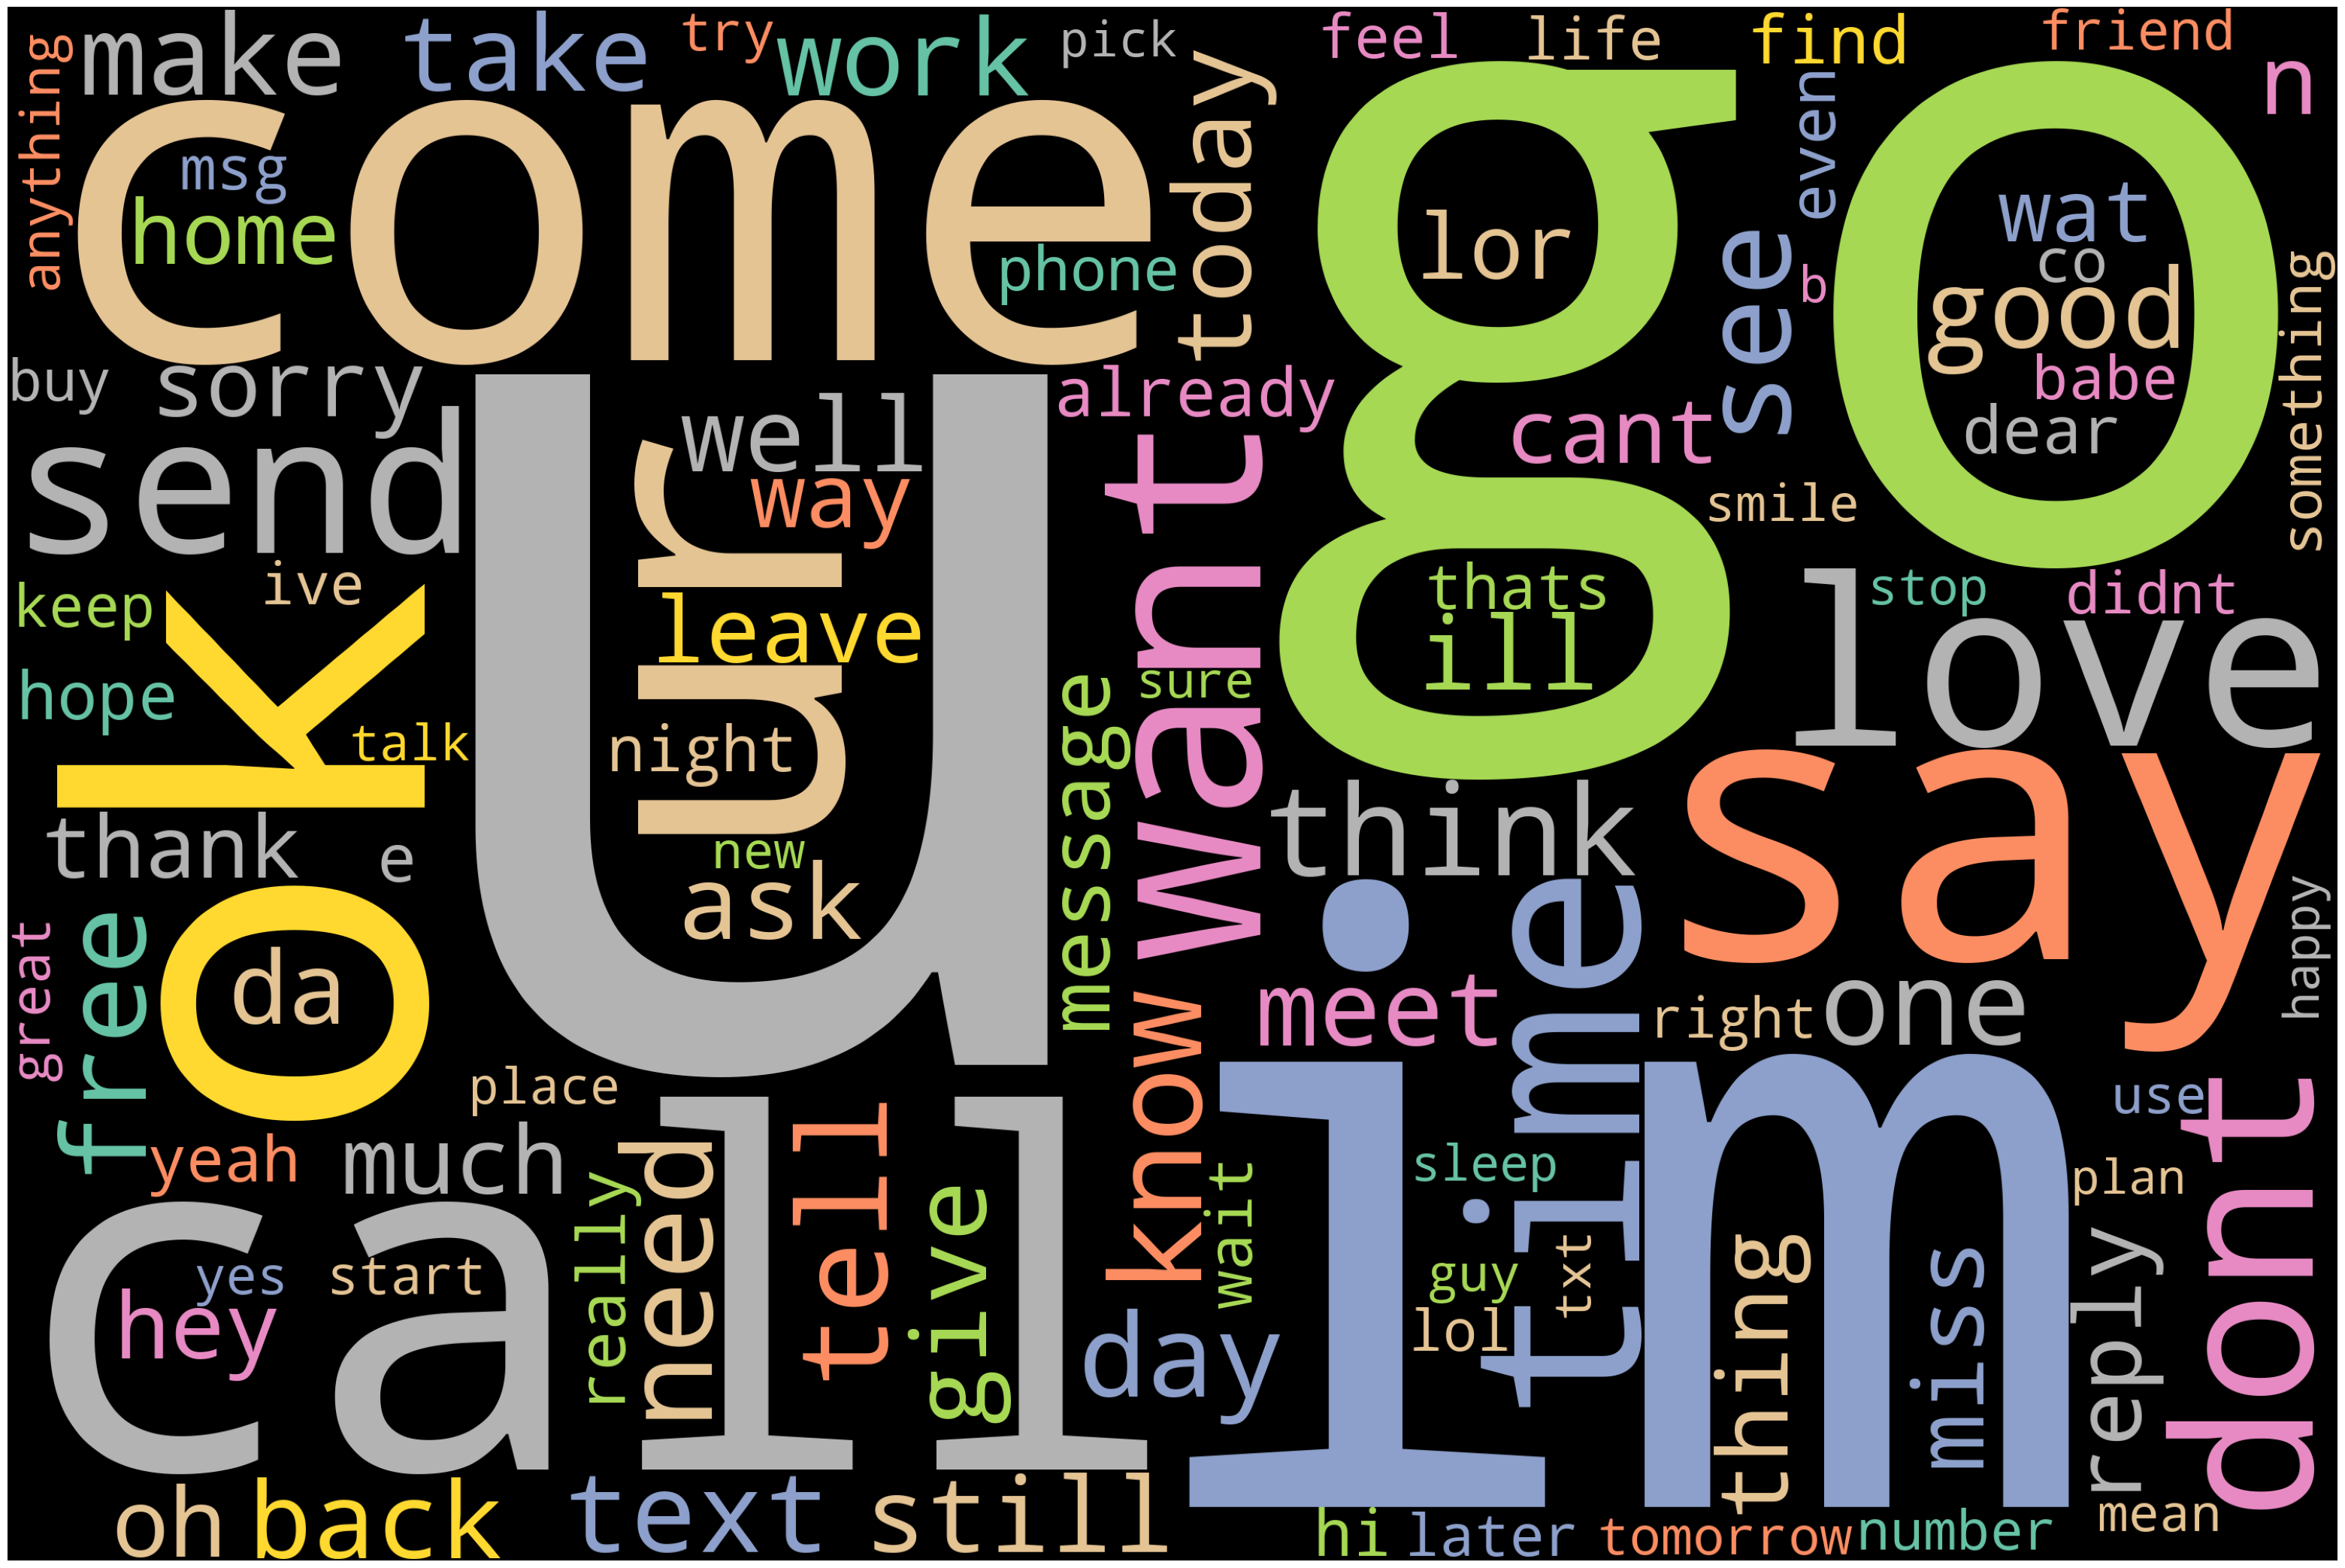

In [29]:
# wordcloud
from wordcloud import WordCloud,STOPWORDS
stopwords = STOPWORDS
def plot_wordcloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis("off")
wordcloud = WordCloud(width = 3000,height = 2000,background_color="black",max_words=100,colormap="Set2",stopwords=stopwords).generate(doc)
plot_wordcloud(wordcloud)

# Vectorization

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm="l2",min_df=4,analyzer="word",ngram_range=(1,3))

In [88]:
vect = vectorizer.fit(data.processed_email)
X = vect.transform(data.processed_email)

In [89]:
print(vectorizer.vocabulary_)
X.shape

{'hope': 1574, 'good': 1404, 'week': 3550, 'check': 711, 'hope good': 1577, 'good week': 1418, 'back': 447, 'thank': 3161, 'also': 341, 'cbe': 679, 'pay': 2400, 'complimentary': 797, 'star': 2989, 'ibiza': 1612, 'holiday': 1555, '10000': 44, 'cash': 660, 'need': 2214, 'urgent': 3408, 'collection': 762, 'landline': 1812, 'lose': 1942, 'ibiza holiday': 1613, 'holiday 10000': 1556, '10000 cash': 45, 'ibiza holiday 10000': 1614, 'holiday 10000 cash': 1557, 'dear': 937, 'final': 1201, 'notice': 2286, 'collect': 761, 'tenerife': 3130, '5000': 198, 'award': 425, 'call': 579, 'tcs': 3103, 'sae': 2711, 'cw25wx': 907, '150ppm': 87, 'tenerife holiday': 3131, 'holiday 5000': 1558, '5000 cash': 201, 'award call': 433, 'tcs sae': 3108, 'tenerife holiday 5000': 3132, 'holiday 5000 cash': 1560, 'aiya': 327, 'discuss': 994, 'later': 1829, 'lar': 1817, 'pick': 2437, 'much': 2178, 'please': 2462, 'ask': 396, 'father': 1172, 'mobile': 2112, 'play': 2452, 'official': 2310, 'game': 1316, '450': 176, 'ur': 3

(5559, 3750)

In [90]:
print(vectorizer.get_feature_names_out())
print(X.shape)

['020603' '020603 2nd' '020603 2nd attempt' ... 'ûªs' 'ûªt' 'ûï']
(5559, 3750)


In [91]:
# split the data
Y = data.type

In [92]:
Y

0        ham
1        ham
2        ham
3       spam
4       spam
        ... 
5554     ham
5555     ham
5556    spam
5557    spam
5558     ham
Name: type, Length: 5559, dtype: object

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   type             5559 non-null   object
 1   text             5559 non-null   object
 2   processed_email  5559 non-null   object
dtypes: object(3)
memory usage: 130.4+ KB


In [94]:
X = pd.DataFrame(x_dense,columns = vectorizer.get_feature_names_out())

In [95]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Columns: 3750 entries, 020603 to ûï
dtypes: float64(3750)
memory usage: 159.0 MB


In [96]:
X.head()

,020603,020603 2nd,020603 2nd attempt,0800,0800 542,08000839402,08000930705,08000930705 delivery,08001950382,08002986906,...,ââ,ââ ûï,ââèïll,ââèïm,ââèïs,ââèït,ûªm,ûªs,ûªt,ûï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5559 entries, 0 to 5558
Series name: type
Non-Null Count  Dtype 
--------------  ----- 
5559 non-null   object
dtypes: object(1)
memory usage: 43.6+ KB


In [98]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Columns: 3750 entries, 020603 to ûï
dtypes: float64(3750)
memory usage: 159.0 MB


In [99]:
X

,020603,020603 2nd,020603 2nd attempt,0800,0800 542,08000839402,08000930705,08000930705 delivery,08001950382,08002986906,...,ââ,ââ ûï,ââèïll,ââèïm,ââèïs,ââèït,ûªm,ûªs,ûªt,ûï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=7)

In [101]:
print("x-train",x_train.shape)
print("x-test",x_test.shape)
print("y-train",y_train.shape)
print("y-test",y_test.shape)

x-train (4447, 3750)
x-test (1112, 3750)
y-train (4447,)
y-test (1112,)


In [102]:
y_test

582      ham
3009     ham
773     spam
3853     ham
3807     ham
        ... 
2501     ham
3087     ham
1921     ham
3503     ham
2222     ham
Name: type, Length: 1112, dtype: object

In [103]:
# building model for classification of email as spam or ham
from sklearn.naive_bayes import MultinomialNB,GaussianNB
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [104]:
y_train_pred = model.predict(x_train)

In [105]:
# testing the model accuracy
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_train,y_train_pred))

0.9775129300652124


In [106]:
print(accuracy_score(y_test,model.predict(x_test)))

0.9694244604316546


In [107]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       963
        spam       1.00      0.77      0.87       149

    accuracy                           0.97      1112
   macro avg       0.98      0.89      0.93      1112
weighted avg       0.97      0.97      0.97      1112



In [108]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      3849
        spam       1.00      0.83      0.91       598

    accuracy                           0.98      4447
   macro avg       0.99      0.92      0.95      4447
weighted avg       0.98      0.98      0.98      4447



In [110]:
# testing the accuracy with new email
email = """Subject: Congratulations! You've won a $1,000 gift card!

Dear User,

Congratulations! You have been selected to receive a $1,000 gift card from [Company Name]. This is not a joke! Act now to claim your reward.

All you need to do is click on the link below and provide your details to confirm your eligibility:

[Click Here to Claim Your Prize]

Hurry, this offer is limited to the first 100 users only! Don't miss out on this incredible opportunity to win big!

Best regards,
The [Company Name] Team

P.S. Remember to act fast. This is a once-in-a-lifetime opportunity!
"""
print(email)

Subject: Congratulations! You've won a $1,000 gift card!

Dear User,

Congratulations! You have been selected to receive a $1,000 gift card from [Company Name]. This is not a joke! Act now to claim your reward.

All you need to do is click on the link below and provide your details to confirm your eligibility:

[Click Here to Claim Your Prize]

Hurry, this offer is limited to the first 100 users only! Don't miss out on this incredible opportunity to win big!

Best regards,
The [Company Name] Team

P.S. Remember to act fast. This is a once-in-a-lifetime opportunity!



In [116]:
# clean the mail
cleaned_mail = [clean_text(email)]

In [117]:
cleaned_mail

['subject congratulations youve 1000 gift card dear user congratulations select receive 1000 gift card company name joke act claim reward need click link provide detail confirm eligibility click claim prize hurry offer limit first 100 users dont miss incredible opportunity win big best regard company name team ps remember act fast onceinalifetime opportunity']

In [118]:
processed_email = vect.transform(cleaned_mail)

In [119]:
model.predict(processed_email)

array(['spam'], dtype='<U4')

In [121]:
processed_email.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [122]:
def predict(email):
    email = clean_text(email)
    email = [email]
    processed_email = vect.transform(email)
    prediction = model.predict(processed_email)
    return prediction
x = predict(email)

In [123]:
x

array(['spam'], dtype='<U4')

In [130]:
mail="you have own 3000 million $ rupees free freee free , just need to deposit 1000 rupees to our account"
predict(mail)

array(['ham'], dtype='<U4')

In [132]:
predict("complimentary 4 STAR Ibiza Holiday or å£10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+")


array(['spam'], dtype='<U4')

In [133]:
predict("U can WIN å£100 of Music Gift Vouchers every week starting NOW Txt the word DRAW to 87066 TsCs www.ldew.com SkillGame,1Winaweek, age16.150ppermessSubscription")

array(['spam'], dtype='<U4')

In [134]:
# saving the model and vectorizer
import joblib
joblib.dump(model,"model.pkl")
joblib.dump(vect,"vectorizer.pkl")

['vectorizer.pkl']